In [1]:
import pandas as pd
import numpy as np


In [2]:
pd.__version__

'1.4.3'

## Broadcasting example 1 

In [3]:
M = np.ones((2, 3))
a = np.arange(3)

In [4]:
M.shape

(2, 3)


## We see by rule 1 that the array a has fewer dimensions, so we pad it on the left with ones:
## By rule 2, we now see that the first dimension disagrees, so we stretch this dimension to match:

In [5]:
a.shape 

(3,)

In [6]:
print("M ={}  , \n\n\n  a={}".format(M,a))

M =[[1. 1. 1.]
 [1. 1. 1.]]  , 


  a=[0 1 2]


In [7]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

## Broadcasting example 2

In [8]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)

In [9]:
print("a ={}  , \n\n\n  b={}".format(a,b))

a =[[0]
 [1]
 [2]]  , 


  b=[0 1 2]


In [10]:
a.shape

(3, 1)

In [11]:
b.shape

(3,)

In [12]:
# Rule 1 says we must pad the shape of b with ones:
# And rule 2 tells us that we upgrade each of these ones 
# to match the corresponding size of the other array

In [13]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

## Broadcasting example 3

In [14]:
M = np.ones((3, 2))
a = np.arange(3)

In [15]:
print("M ={}  , \n\n\n  a={}".format(M,a))

M =[[1. 1.]
 [1. 1.]
 [1. 1.]]  , 


  a=[0 1 2]


In [16]:
print("M.shpae ={}  , \n\n\n  a.shape={}".format(M.shape,a.shape))

M.shpae =(3, 2)  , 


  a.shape=(3,)


In [17]:
# # M+a
# ---------------------------------------------------------------------------
# ValueError                                Traceback (most recent call last)
# Input In [17], in <cell line: 1>()
# ----> 1 M+a

# ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

## Note the potential confusion here: 
you could imagine making a and M compatible by, say, padding a's shape with ones on the right rather than the left. But this is not how the broadcasting rules work!

## If right-side padding is what you'd like, 
  you can do this explicitly by reshaping the array 
  (we'll use the np.newaxis keyword

In [18]:
a[:, np.newaxis].shape

(3, 1)

In [19]:
print("M={}  , \n\n\n  a={}".format(M,a))

M=[[1. 1.]
 [1. 1.]
 [1. 1.]]  , 


  a=[0 1 2]


In [20]:
print("M.shpae ={}  , \n\n\n  a.shape={}".format(M.shape,a.shape))

M.shpae =(3, 2)  , 


  a.shape=(3,)


In [21]:
M + a[:, np.newaxis]

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

these broadcasting rules apply to any binary ufunc. For example, here is the logaddexp(a, b) function, which computes log(exp(a) + exp(b)) with more precision than the naive approach:

In [22]:
np.logaddexp(M, a[:, np.newaxis])

array([[1.31326169, 1.31326169],
       [1.69314718, 1.69314718],
       [2.31326169, 2.31326169]])

## Broadcasting in Practice  Broadcasting 實務

In [23]:
X = np.random.random((10, 3))

In [24]:
# We can compute the mean of each feature using the mean aggregate across the first dimension:
Xmean = X.mean(axis= 0)
Xmean

array([0.54534129, 0.43589087, 0.58643973])

In [25]:
# And now we can center the X array by subtracting the mean (this is a broadcasting operation):
X_centered = X - Xmean

In [26]:
# To within machine precision, the mean is now zero. 每欄位的離均差總和=0
X_centered.mean(axis=0)

array([-6.66133815e-17,  3.33066907e-17, -8.88178420e-17])

In [27]:
x = np.array([1, 2, 3, 4, 5])

In [28]:
# 透過Ufuncs對向量化運算，幾乎總是比使用python內建loop來的有效率，尤其是當陣列成長到更大時。 分為unary binary兩種方式。
x=np.arange(5)
y=np.empty(5)

In [29]:
np.multiply(x,10, out= y)  #對於大量計算，有時指定計算結果直接在已建立的記憶體位置上寫入，可以使用out參數來做，增加效率

array([ 0., 10., 20., 30., 40.])

In [30]:
y=np.zeros(10)
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [31]:
np.power(2,x,out=y[::2])  
#把結果寫入某個指定陣列，以每隔固定間隔的方式放置。
# 比 y[::2]=2**x 省下建立一個暫時性的陣列

array([ 1.,  2.,  4.,  8., 16.])

In [32]:
y 

array([ 1.,  0.,  2.,  0.,  4.,  0.,  8.,  0., 16.,  0.])

In [33]:
# 利用broadcasting 製作九九乘法表
a1=np.arange(1,10).reshape(1,9)
a2=np.arange(1,10).reshape(9,1)
a1*a2
print(a1*a2)

[[ 1  2  3  4  5  6  7  8  9]
 [ 2  4  6  8 10 12 14 16 18]
 [ 3  6  9 12 15 18 21 24 27]
 [ 4  8 12 16 20 24 28 32 36]
 [ 5 10 15 20 25 30 35 40 45]
 [ 6 12 18 24 30 36 42 48 54]
 [ 7 14 21 28 35 42 49 56 63]
 [ 8 16 24 32 40 48 56 64 72]
 [ 9 18 27 36 45 54 63 72 81]]


## 聚合:

對於binary ufuncs，若打算使用特定的運算重複，應用到陣列中的每一個元素，直到剩下一個結果為止

In [34]:
x = np.arange(1,6)

In [35]:
np.add.reduce(x)# 1+...+5

15

In [36]:
np.multiply.reduce(x) # 5!=1*..*5

120

In [37]:
np.add.accumulate(x,dtype='int16')

array([ 1,  3,  6, 10, 15], dtype=int16)

## One place that broadcasting is very useful is in displaying images 
based on two-dimensional functions. If we want to define a function $z = f(x, y)$, broadcasting can be used to compute the function across the grid

In [38]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

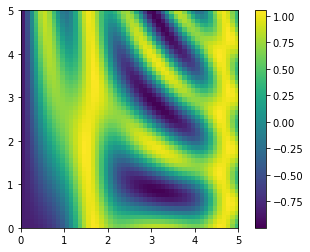

In [39]:
import matplotlib.pyplot as plt
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5],
           cmap='viridis')
plt.colorbar();

# Comparisons, Masks, and Boolean Logic
   比較、遮罩、以及布林邏輯

In [40]:
import numpy as np
import pandas as pd

# use pandas to extract rainfall inches as a NumPy array
df = pd.read_csv('./Seattle2014.csv')
rainfall = pd.read_csv('./Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0  # 1/10mm -> inches     1英吋值乘以25.4= 1 mm
inches.shape
# The inches array contains 365 values, giving daily rainfall in inches from January 1 to December 31, 2014.


(365,)

In [41]:
df.head(5)

,STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,WT01,WT05,WT02,WT03
0,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140101,0,0,0,72,33,12,340,310,36,40,-9999,-9999,-9999,-9999
1,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140102,41,0,0,106,61,32,190,200,94,116,-9999,-9999,-9999,-9999
2,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140103,15,0,0,89,28,26,30,50,63,72,1,-9999,-9999,-9999
3,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140104,0,0,0,78,6,27,40,40,45,58,1,-9999,-9999,-9999
4,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140105,0,0,0,83,-5,37,10,10,67,76,-9999,-9999,-9999,-9999


In [42]:
df["PRCP"].values;

In [43]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles

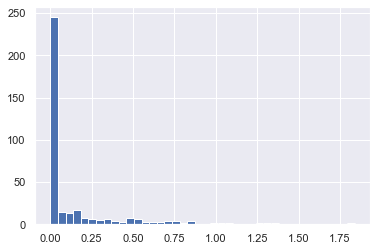

In [44]:
plt.hist(inches, 40);

## 上圖法傳遞出更具體的資訊:這一年有多少個下雨天?下雨天的平均降雨量?多少天降雨量超過半英吋?
## 所以我們需要做深入挖掘資料Digging into the data ，接下來跳脫資料，討論Numpy中的遮罩來快速回答這一類問題

## 比較運算子-使用布林陣列-布林運算子-布林陣列當遮罩

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn ;
seaborn.set()

In [46]:
x=np.arange(1,10)

In [47]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False, False, False, False, False])

In [48]:
np.less(x,3) #等價x<3

array([ True,  True, False, False, False, False, False, False, False])

In [49]:
x<3

array([ True,  True, False, False, False, False, False, False, False])

In [50]:
np.less_equal(x,3)

array([ True,  True,  True, False, False, False, False, False, False])

In [51]:
np.equal(x,3)

array([False, False,  True, False, False, False, False, False, False])

In [52]:
np.not_equal(x,3)

array([ True,  True, False,  True,  True,  True,  True,  True,  True])

In [53]:
np.greater(x,3)

array([False, False, False,  True,  True,  True,  True,  True,  True])

In [54]:
np.greater_equal(x,3)

array([False, False,  True,  True,  True,  True,  True,  True,  True])

In [55]:
rng = np.random.RandomState(0)
x=rng.randint(0,10,size=(3,4))
x
# 方式等價於
# np.random.seed(0)
# np.random.randint(0,10,size=(3,4))

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [56]:
x<6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

In [57]:
np.count_nonzero(x<6)

8

In [58]:
np.sum(x<6, axis = 1).reshape(3,1) 
#方式比count_nonzero好的原因 :可以設定 axis=1 計算每一列有多少個數小於6

array([[4],
       [2],
       [2]])

In [59]:
# 快速檢查是否  陣列中所有數值皆True / False
# 快速檢查是否  陣列中存在一個數值皆True / False

In [60]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [61]:
np.all(x>8)

False

In [62]:
np.any(x<10)

True

In [63]:
np.any(x==10)

False

In [64]:
np.any(x>8)

True

In [65]:
# 檢查每一列中，是否所有數值都小於8
np.all(x<8,axis = 1)

array([ True, False,  True])

In [66]:
x[x<5] #傳回符合條件的數值，以一維陣列呈現從左到右，從上而下

array([0, 3, 3, 3, 2, 4])

## 將數字二進位化，並做位元的布林運算

In [67]:
bin(42) # 2+8+32=42

'0b101010'

In [68]:
bin(59) # 1+2+8+16+32=59

'0b111011'

In [69]:
bin(42&59)  #同位元中，兩者皆1顯示結果1

'0b101010'

In [70]:
bin(42|59) #同位元中，其中有1顯示結果1

'0b111011'

## Fancy 索引
概念上: 它傳遞一個陣列作為索引，以利一次存取多個陣列元素

In [71]:
row = np.array([0,1,2])
row

array([0, 1, 2])

In [72]:
col = np.array([2,1,3])
col

array([2, 1, 3])

In [73]:
X = np.arange(12).reshape((3,4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [74]:
X[row,col] # 取出 X[0,2],X[1,1],X[2,3]

array([ 2,  5, 11])

In [75]:
X[row[:,np.newaxis],col] 
#行向量[0,1,2] broadcasting 列向量[2,1,3] 形成3x3 : 九個數對 索引

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [76]:
[row[:,np.newaxis],col]
# [ [(0,2),(0,1),(0,3)],
#   [(1,2),(1,1),(1,3)],
#   [(2,2),(2,1),(2,3)]
# ]

[array([[0],
        [1],
        [2]]),
 array([2, 1, 3])]

In [77]:
i=[2,3,3,4,4,4]

In [78]:
x = np.zeros(10)
x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [79]:
np.zeros_like(X)

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [80]:
np.add.at(x,i,1)
x

array([0., 0., 1., 2., 3., 0., 0., 0., 0., 0.])

## 資料裝箱應用

In [81]:
bins= np.linspace(-5,5,20)
bins

array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
       -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
        0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
        2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ])

In [82]:
x=np.random.randn(100)

In [83]:
counts = np.zeros_like(bins)
counts

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [84]:
# numpy.searchsorted(a, v, side='left', sorter=None) 
# side   returned index i satisfies
# left   a[i-1] < v <= a[i]
# right  a[i-1] <= v < a[i]
# Returns: indices  int or array of ints
# Array of insertion points with the same shape as v, 
# or an integer if v is a scalar.
i=np.searchsorted(bins,x)

In [85]:
i

array([ 6, 11, 10,  8,  9,  9, 15, 11, 11, 10,  9,  9,  6, 15,  9,  9, 13,
       12,  8,  9,  9,  9,  8,  8,  8, 11, 10, 12, 10, 11, 12, 11, 10, 12,
        8,  8,  8, 14, 12, 11, 12, 13, 10, 11,  9, 11,  8, 12, 10, 13, 11,
       12,  8,  9,  8, 10, 10,  9,  8, 11,  8,  9,  7, 11,  9, 10,  9, 11,
       12, 10,  9, 10,  8,  8,  6, 10, 13, 10, 10, 13,  8, 11, 12,  9,  9,
       10,  7,  9, 12, 10, 12, 10,  9,  6, 12,  9,  9,  8,  8, 11],
      dtype=int64)

In [86]:
np.add.at(counts,i,1)

In [87]:
counts

array([ 0.,  0.,  0.,  0.,  0.,  0.,  4.,  2., 18., 22., 18., 15., 13.,
        5.,  1.,  2.,  0.,  0.,  0.,  0.])

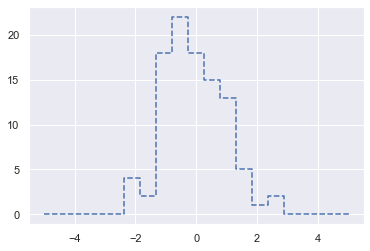

In [88]:
plt.plot(bins,counts, linestyle='--', drawstyle='steps' )

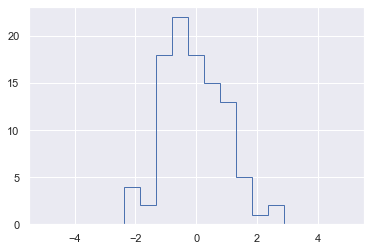

In [89]:
# 或是直接使用套件plt.hist， 其使用了np.histogram函式方法，特點是data資料量變大時，可以有較優異的效能
plt.hist(x, bins,histtype='step'); #加上分號不顯示陣列細節，只需顯示圖片即可

In [90]:
N=int(1e6)
N

1000000

In [91]:
x = np.random.randn(N)

In [92]:
print("Numpy routine: \n適用於大型資料勝")
%timeit counts,edges = np.histogram(x,bins)
print("Custom routine:")
%timeit np.add.at(counts,np.searchsorted(bins,x),1)

Numpy routine: 
適用於大型資料勝
62.5 ms ± 641 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
84.6 ms ± 150 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [93]:
# Numpy中的快速排序法quicksort algorithm : np.sort  np.argsort
x = np.array([2,1,4,3,5])   #y=np.arange(1,6)  y
x

array([2, 1, 4, 3, 5])

In [94]:
np.sort(x) #升值順序下排序

array([1, 2, 3, 4, 5])

In [95]:
i = np.argsort(x) #抓出序位陣列

In [96]:
i

array([1, 0, 3, 2, 4], dtype=int64)

In [97]:
x[np.argsort(x)]  #升值順序下排序，另外一種方式

array([1, 2, 3, 4, 5])

In [98]:
rand = np.random.RandomState(42)
X = rand.randint(0,10,size = (4,6))

In [99]:
X

array([[6, 3, 7, 4, 6, 9],
       [2, 6, 7, 4, 3, 7],
       [7, 2, 5, 4, 1, 7],
       [5, 1, 4, 0, 9, 5]])

In [100]:
np.sort(X,axis=0)  #針對每一欄中的不同列元素，做行排序

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [101]:
np.sort(X,axis=1)  #針對每一列中的不同行元素，做列排序

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

## 部分分區排序

In [102]:
np.partition(X,2,axis = 1)  
#針對每一列中的不同行元素分兩區，該列最小的兩個值放在左側前兩個位序

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

## Knn鄰近法  
相異兩點的距離

In [103]:
X = rand.rand(10,2) #  X.shape  (10, 2)

In [104]:
import matplotlib.pyplot as plt
import seaborn;
seaborn.set()

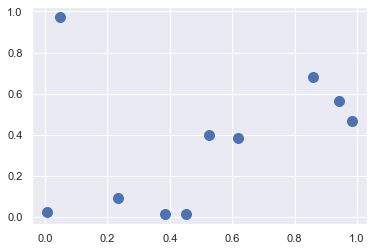

In [105]:
plt.scatter(X[:,0], X[:,1],s=100)

In [106]:
X[:,np.newaxis] #.shape (10, 1, 2)

array([[[0.00706631, 0.02306243]],

       [[0.52477466, 0.39986097]],

       [[0.04666566, 0.97375552]],

       [[0.23277134, 0.09060643]],

       [[0.61838601, 0.38246199]],

       [[0.98323089, 0.46676289]],

       [[0.85994041, 0.68030754]],

       [[0.45049925, 0.01326496]],

       [[0.94220176, 0.56328822]],

       [[0.3854165 , 0.01596625]]])

In [107]:
X[np.newaxis,:] #.shape (1, 10, 2)

array([[[0.00706631, 0.02306243],
        [0.52477466, 0.39986097],
        [0.04666566, 0.97375552],
        [0.23277134, 0.09060643],
        [0.61838601, 0.38246199],
        [0.98323089, 0.46676289],
        [0.85994041, 0.68030754],
        [0.45049925, 0.01326496],
        [0.94220176, 0.56328822],
        [0.3854165 , 0.01596625]]])

In [108]:
diff = X[:,np.newaxis] - X[np.newaxis,:]

In [109]:
diff.shape

(10, 10, 2)

In [110]:
sq_diff=diff**2

In [111]:
sq_diff

array([[[0.00000000e+00, 0.00000000e+00],
        [2.68021941e-01, 1.41977145e-01],
        [1.56810915e-03, 9.03817359e-01],
        [5.09427629e-02, 4.56219322e-03],
        [3.73711781e-01, 1.29168048e-01],
        [9.52897288e-01, 1.96870105e-01],
        [7.27394233e-01, 4.31971139e-01],
        [1.96632778e-01, 9.59902985e-05],
        [8.74478311e-01, 2.91843907e-01],
        [1.43148872e-01, 5.03556687e-05]],

       [[2.68021941e-01, 1.41977145e-01],
        [0.00000000e+00, 0.00000000e+00],
        [2.28588213e-01, 3.29354951e-01],
        [8.52659388e-02, 9.56383688e-02],
        [8.76308468e-03, 3.02724521e-04],
        [2.10182111e-01, 4.47586710e-03],
        [1.12336078e-01, 7.86502769e-02],
        [5.51683628e-03, 1.49456475e-01],
        [1.74245380e-01, 2.67084648e-02],
        [1.94206961e-02, 1.47375156e-01]],

       [[1.56810915e-03, 9.03817359e-01],
        [2.28588213e-01, 3.29354951e-01],
        [0.00000000e+00, 0.00000000e+00],
        [3.46353231e-02, 7.799

In [112]:
sq_diff.shape

(10, 10, 2)

In [163]:
dist_sq=sq_diff.sum(axis = -1)

In [164]:
dist_sq  #.shape(10, 10)

array([[0.        , 0.40999909, 0.90538547, 0.05550496, 0.50287983,
        1.14976739, 1.15936537, 0.19672877, 1.16632222, 0.14319923],
       [0.40999909, 0.        , 0.55794316, 0.18090431, 0.00906581,
        0.21465798, 0.19098635, 0.15497331, 0.20095384, 0.16679585],
       [0.90538547, 0.55794316, 0.        , 0.81458763, 0.67649219,
        1.13419594, 0.74752753, 1.08562368, 0.9704683 , 1.03211241],
       [0.05550496, 0.18090431, 0.81458763, 0.        , 0.23387834,
        0.70468321, 0.74108843, 0.05338715, 0.72671958, 0.0288717 ],
       [0.50287983, 0.00906581, 0.67649219, 0.23387834, 0.        ,
        0.14021843, 0.1470605 , 0.16449241, 0.13755476, 0.18859392],
       [1.14976739, 0.21465798, 1.13419594, 0.70468321, 0.14021843,
        0.        , 0.06080186, 0.48946337, 0.01100053, 0.56059965],
       [1.15936537, 0.19098635, 0.74752753, 0.74108843, 0.1470605 ,
        0.06080186, 0.        , 0.61258786, 0.02046045, 0.66652228],
       [0.19672877, 0.15497331, 1.0856236

In [167]:
ii = np.argsort(dist_sq,axis=1) #沿著每一列排序_序位
ii.shape

(10, 10)

In [168]:
dist_sq[1,:]

array([0.40999909, 0.        , 0.55794316, 0.18090431, 0.00906581,
       0.21465798, 0.19098635, 0.15497331, 0.20095384, 0.16679585])

In [169]:
np.random.seed(0)
xxx=np.random.randint(0,100,size=(3,4))
xxx

array([[44, 47, 64, 67],
       [67,  9, 83, 21],
       [36, 87, 70, 88]])

In [170]:
np.argsort(xxx,axis=1)   #參考https://youtu.be/6W8UHvn8ckg 說明

array([[0, 1, 2, 3],
       [1, 3, 0, 2],
       [0, 2, 1, 3]], dtype=int64)

In [171]:
nearest = np.argsort(dist_sq,axis=1)

In [172]:
nearest

array([[0, 3, 9, 7, 1, 4, 2, 5, 6, 8],
       [1, 4, 7, 9, 3, 6, 8, 5, 0, 2],
       [2, 1, 4, 6, 3, 0, 8, 9, 7, 5],
       [3, 9, 7, 0, 1, 4, 5, 8, 6, 2],
       [4, 1, 8, 5, 6, 7, 9, 3, 0, 2],
       [5, 8, 6, 4, 1, 7, 9, 3, 2, 0],
       [6, 8, 5, 4, 1, 7, 9, 3, 2, 0],
       [7, 9, 3, 1, 4, 0, 5, 8, 6, 2],
       [8, 5, 6, 4, 1, 7, 9, 3, 2, 0],
       [9, 7, 3, 0, 1, 4, 5, 8, 6, 2]], dtype=int64)

In [118]:
K=2
nearest_patition = np.argpartition(dist_sq,K+1 ,axis =1)

In [174]:
nearest_patition

array([[3, 0, 9, 7, 1, 4, 2, 5, 8, 6],
       [1, 4, 7, 9, 3, 5, 6, 2, 8, 0],
       [2, 1, 4, 6, 3, 0, 5, 7, 8, 9],
       [3, 9, 7, 0, 1, 5, 6, 2, 8, 4],
       [1, 8, 4, 5, 7, 6, 9, 3, 2, 0],
       [5, 8, 6, 4, 1, 7, 9, 3, 2, 0],
       [6, 8, 5, 4, 1, 7, 9, 3, 2, 0],
       [7, 9, 3, 1, 4, 5, 6, 2, 8, 0],
       [8, 5, 6, 4, 1, 7, 9, 3, 2, 0],
       [3, 9, 7, 0, 1, 5, 6, 2, 8, 4]], dtype=int64)

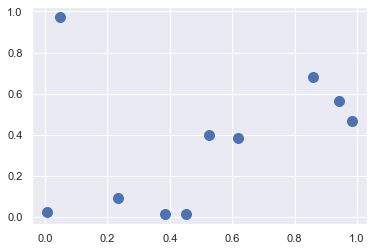

In [177]:
plt.scatter(X[:,0],X[:,1],s=100)

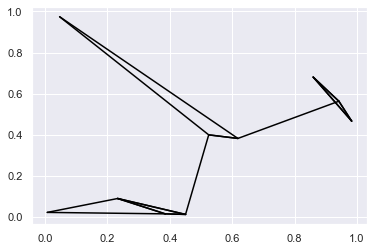

In [212]:
K=2
for i in range(X.shape[0]):
    for j in nearest_patition[i, :K+1]:
        plt.plot(*zip(X[j],X[i]) ,color ="black" ) 
#         https://stackoverflow.com/questions/66111263/using-an-asterisk-to-precede-the-zip-function

In [209]:
# The number 310 occurs many times in a, 
# so I want to sum all the numbers in b that corresponds to 310.

In [210]:
a = [310.0, 510.0, 420.0, 310.0]
b = [1322, 678, 1203, 2347]

print(sum([j for i, j in zip(a,b) if i==310.0]))


3669
